# Energy Conservation

Check if energy is conserved to the same level when `ke != ko`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
class fput_run:
    def __init__(self, filename):
        self.fn = filename
        df = h5py.File(self.fn, "r")
        self.p = df['tasks/p'][:]
        self.q = df['tasks/q'][:]
        self.t = df['scales/t'][:]

        self.et = df['energies/e_tot'][:]
        self.e1 = df['energies/e_1'][:]
        self.e2 = df['energies/e_2'][:]
        self.e1m = df['energies/e_1_emode'][:]
        self.e2m = df['energies/e_2_emode'][:]
        df.close()

In [3]:
run_4 = fput_run("data/run_4_output.h5")
run_5 = fput_run("data/run_5_output.h5")
run_6 = fput_run("data/run_6_output.h5")

Apparently, the ratio is about $\sim 10^6$ times worse for the $k_e \ne k_o$ cases:

In [15]:
r4_ratio = run_4.et[-1]/run_4.et[0] -1 
r5_ratio = run_5.et[-1]/run_5.et[0] -1
r6_ratio = run_6.et[-1]/run_6.et[0] -1

for i,r in enumerate([r4_ratio, r5_ratio, r6_ratio]):
    print("run {:d}: E_f/E_i - 1 = {:16.15e}".format(i+4, r))

run 4: E_f/E_i - 1 = -5.417888360170764e-13
run 5: E_f/E_i - 1 = 2.112308090662651e-07
run 6: E_f/E_i - 1 = 3.503309536911914e-06


...and that difference appears immediately. Here's the error after one timestep

In [16]:
r4_ratio = run_4.et[1]/run_4.et[0] -1 
r5_ratio = run_5.et[1]/run_5.et[0] -1
r6_ratio = run_6.et[1]/run_6.et[0] -1

for i,r in enumerate([r4_ratio, r5_ratio, r6_ratio]):
    print("run {:d}: E_f/E_i - 1 = {:16.15e}".format(i+4, r))

run 4: E_f/E_i - 1 = 4.662936703425657e-15
run 5: E_f/E_i - 1 = 4.305521683622970e-07
run 6: E_f/E_i - 1 = 5.088588110879755e-07


Text(0.5, 0, 'timestep')

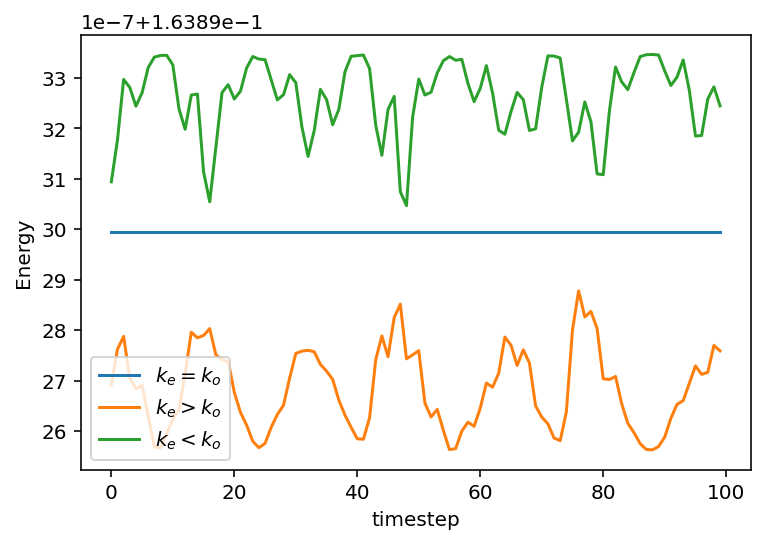

In [19]:
plt.plot(run_4.et[0:100], label=r'$k_e = k_o$')
plt.plot(run_5.et[0:100], label=r'$k_e > k_o$')
plt.plot(run_6.et[0:100], label=r'$k_e < k_o$')
plt.legend()
plt.ylabel("Energy")
plt.xlabel("timestep")

The overall difference comes from the fact that I chose $k_e$ and $k_o$ using `NSolve` in mathematica to maintain $E_0$ constant while having a ratio of $k_e/k_0$ of 2 and 0.5. I guess I didn't use enough digits of precision; it appears that the inital energies differ by about 1 part in $10^6$. Strange that it's about the same as the energy non-conservation.

In [9]:
run_4.et[0]

0.1638929944964577

In [12]:
(run_5.et[0]- run_4.et[0])/run_4.et[0]

-1.849081847235776e-06

In [13]:
(run_6.et[0]- run_4.et[0])/run_4.et[0]

6.062606973827535e-07